In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import seaborn as sns
from PIL import Image
from glob import glob
import os

In [2]:
!pip install opencv-python

WEIZMANN


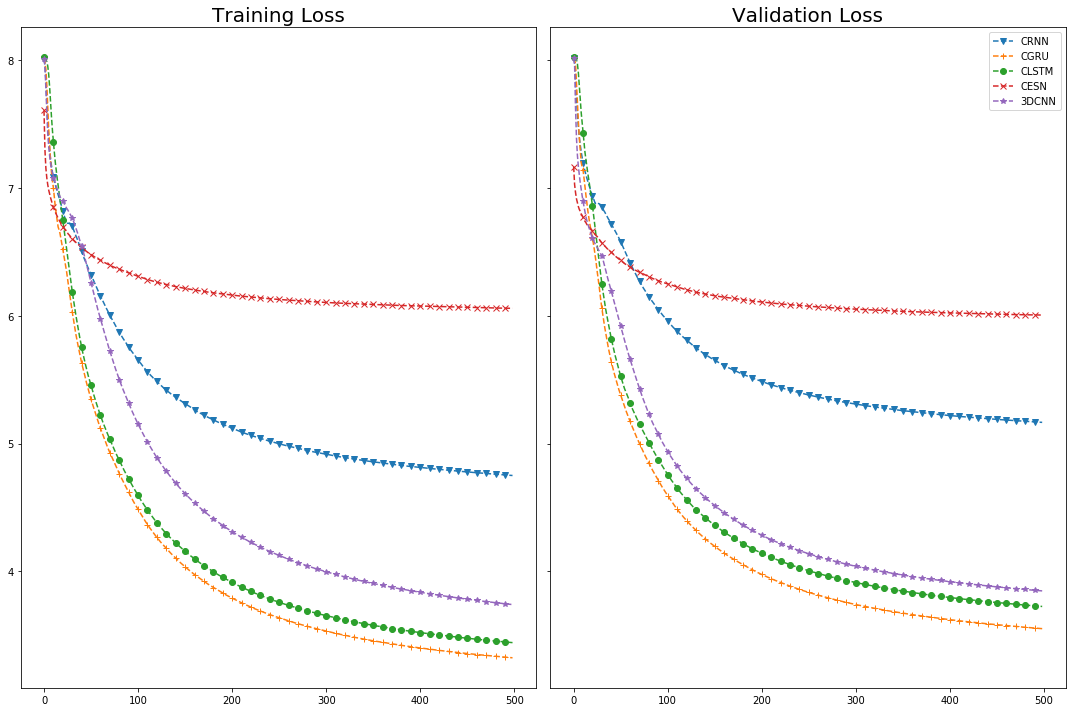

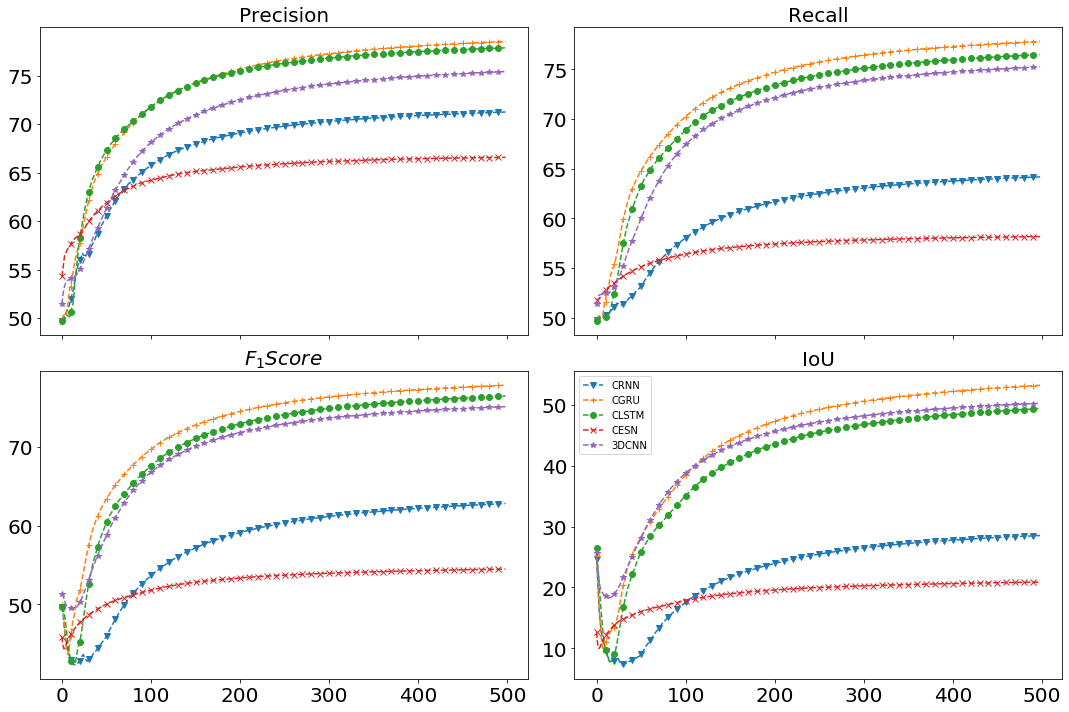

,step,iou,f1score,precision,recall
CGRU,800.0,64.3,76.8,79.3,76.8
3DCNN,800.0,61.9,75.5,77.0,76.0
CLSTM,800.0,61.6,75.5,79.2,75.7
CRNN,800.0,37.4,60.6,66.5,63.7
CESN,7800.0,21.9,53.0,63.2,58.0


BSR


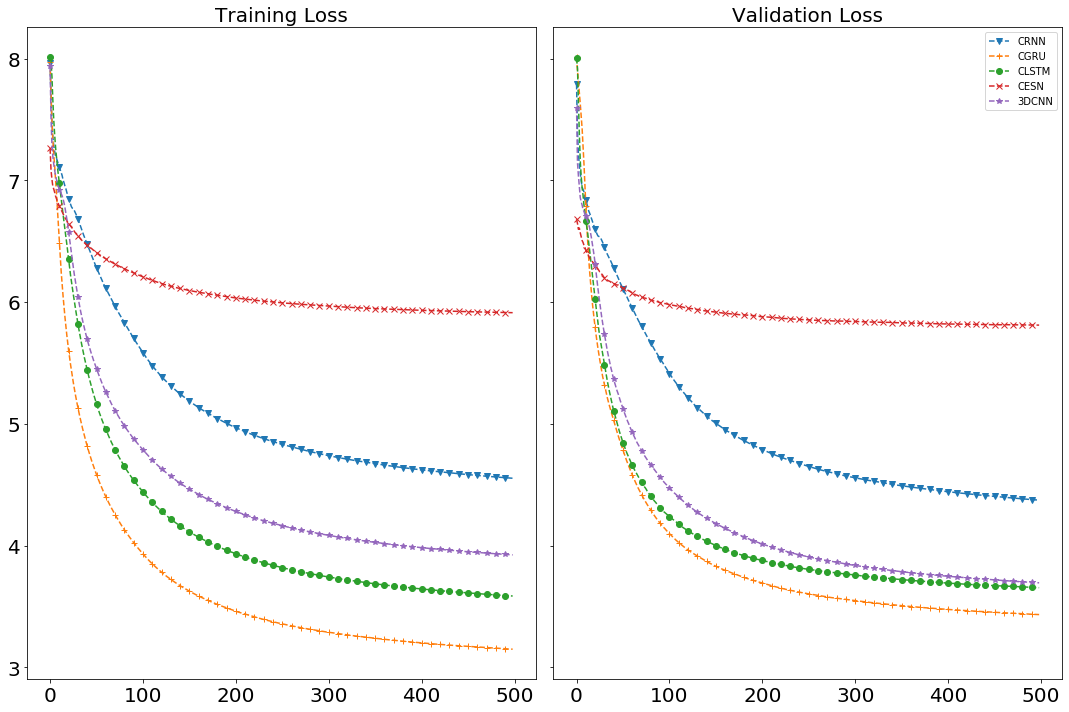

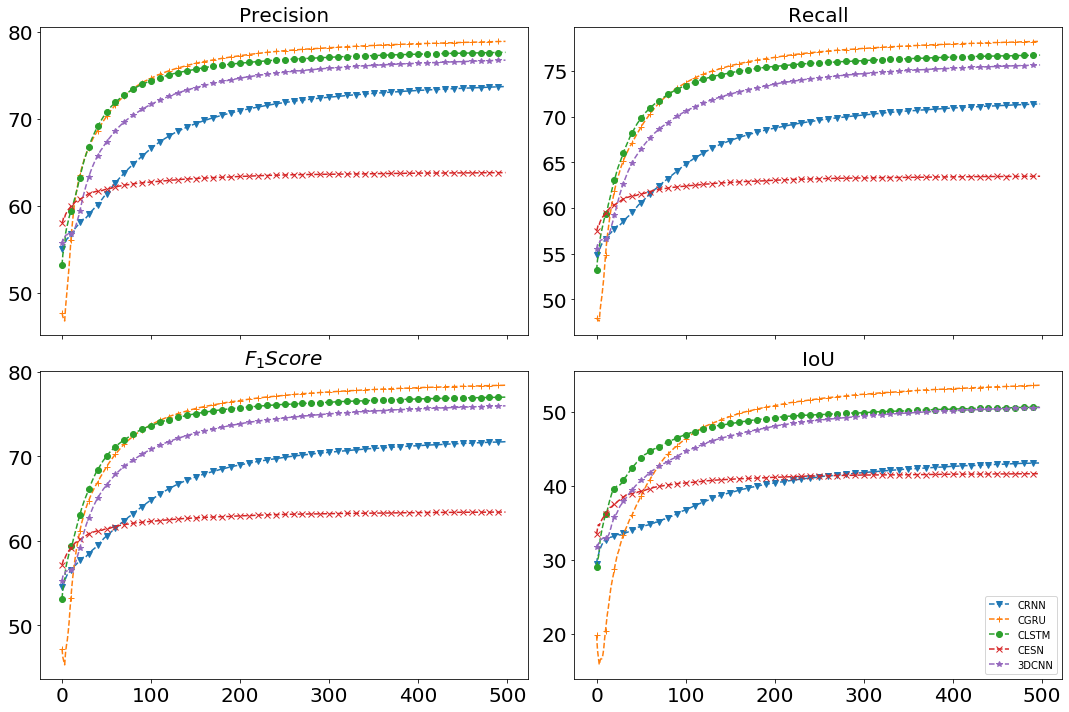

,step,iou,f1score,precision,recall
CGRU,2300.0,56.7,73.4,76.1,73.6
CLSTM,2300.0,54.8,71.1,73.4,71.4
3DCNN,2300.0,53.5,70.7,73.1,71.0
CRNN,2300.0,49.7,69.4,71.8,70.1
CESN,2400.0,37.5,60.0,61.1,62.0


CIFAR_10


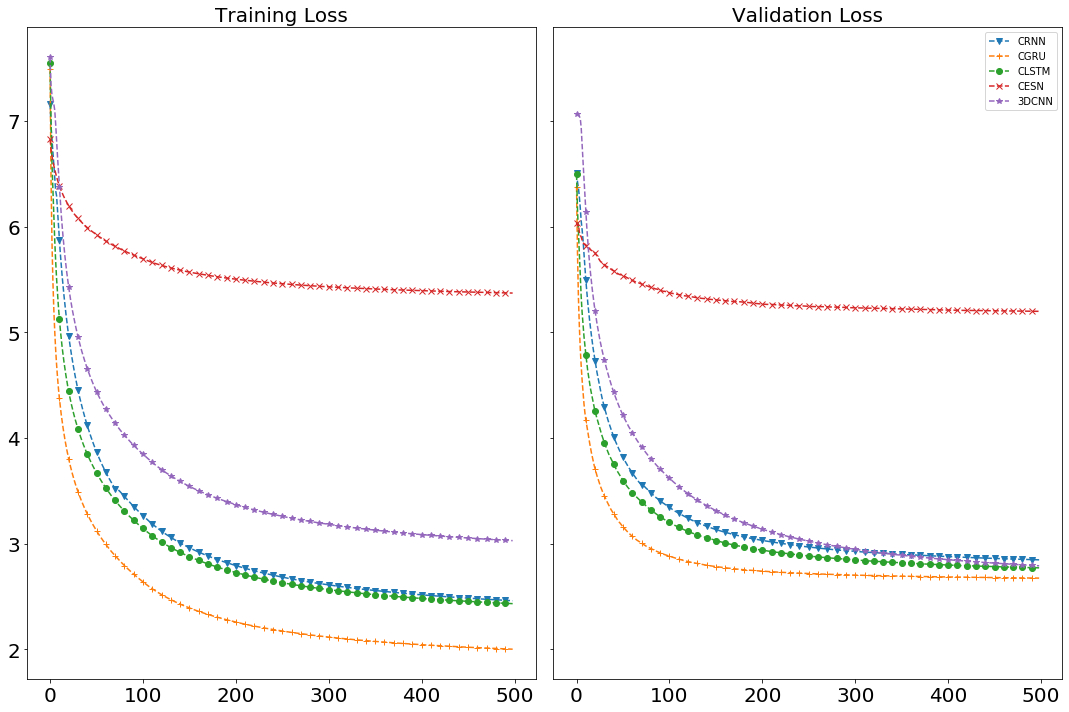

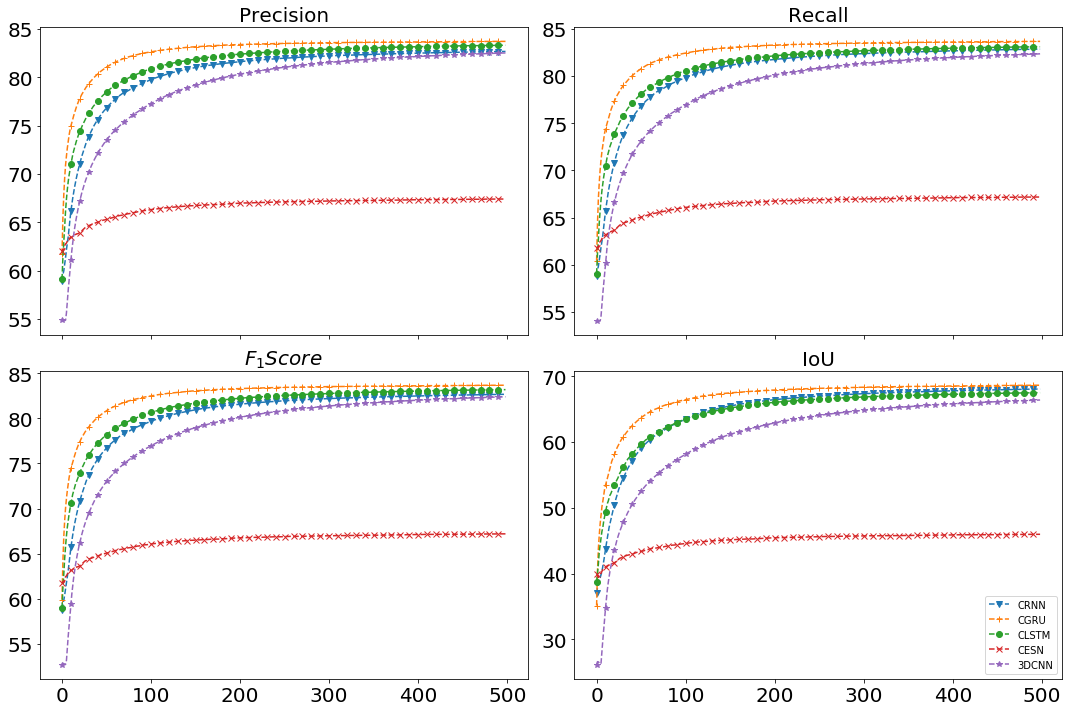

,step,iou,f1score,precision,recall
CLSTM,9800.0,68.8,82.8,83.8,82.5
3DCNN,39800.0,68.7,82.5,83.4,82.2
CGRU,9800.0,68.3,82.4,83.0,82.2
CRNN,9800.0,68.0,81.9,82.9,81.9
CESN,9900.0,44.9,65.1,65.7,66.4


CIFAR_100


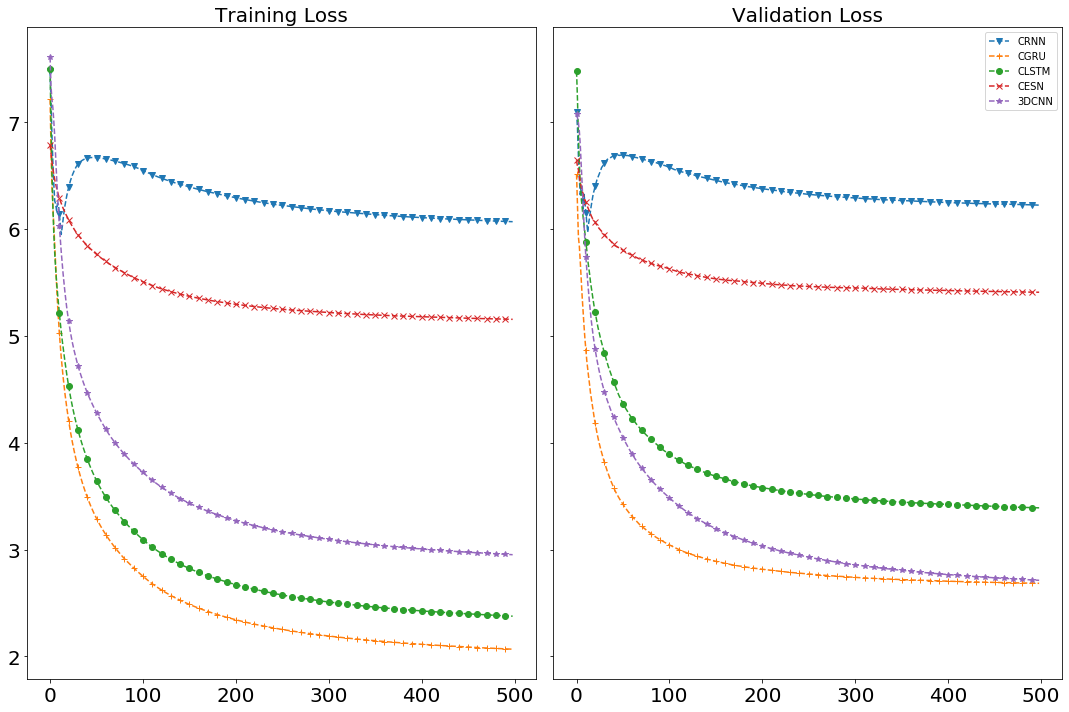

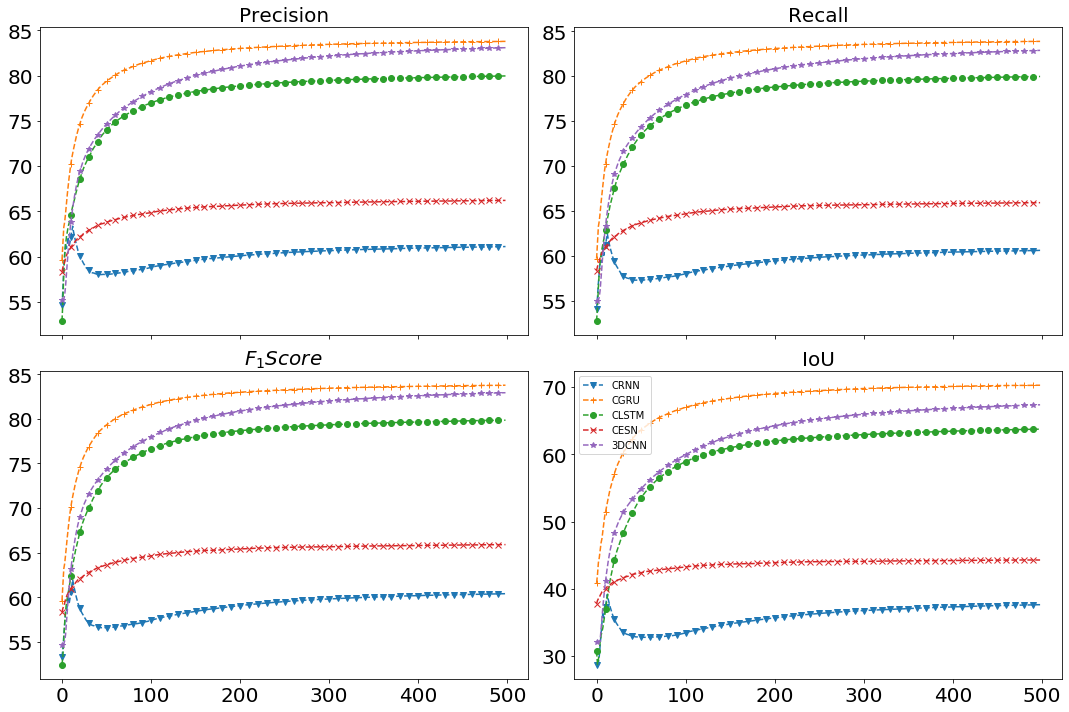

,step,iou,f1score,precision,recall
CGRU,9800.0,71.5,84.2,85.0,83.9
3DCNN,39800.0,69.4,82.8,84.0,82.6
CLSTM,9800.0,65.3,79.9,81.8,79.8
CRNN,9800.0,48.7,68.0,69.3,69.7
CESN,9900.0,44.5,64.8,65.4,66.0


In [3]:
for ds in ['WEIZMANN','BSR', 'CIFAR_10', 'CIFAR_100']:
    print(ds)

    fp_rnn=f'../saved_model/{ds}/RNN/results/'
    fp_gru=f'../saved_model/{ds}/GRU/results/'
    fp_lstm=f'../saved_model/{ds}/LSTM/results/'
    fp_esn=f'../saved_model/{ds}/ESN/results/'
    fp_cnn=f'../saved_model/{ds}/CNN/results/'

    
    dfRNN  = pd.read_csv(glob(os.path.join(fp_rnn, '*valid*'))[0])
    dfLSTM = pd.read_csv(glob(os.path.join(fp_lstm, '*valid*'))[0])
    dfGRU =  pd.read_csv(glob(os.path.join(fp_gru, '*valid*'))[0])
    dfESN = pd.read_csv(glob(os.path.join(fp_esn, '*valid*'))[0])
    dfCNN = pd.read_csv(glob(os.path.join(fp_cnn, '*valid*'))[0])

    font= 20
    markevery=10
    fig, axes = plt.subplots(1,2, figsize=(15,10), sharey=True)

    for df, model_name in zip([dfRNN, dfGRU, dfLSTM, dfESN, dfCNN], ['CRNN', 'CGRU', 'CLSTM','CESN', '3DCNN']):
        y =df['train_loss']
        x=df['epoch']
        if model_name=='CESN':
            mk='x'
        if model_name=='CLSTM':
            mk='o'
        if model_name=='CRNN':
            mk='v'
        if model_name=='CGRU':
            mk='+'
        if model_name=='3DCNN':
            mk='*'
        axes[0].plot(x, y , label=model_name, linestyle='--', marker=mk, markevery=markevery)
        axes[0].set_title('Training Loss', size=font)

        y =df['valid_loss']
        if model_name=='CESN':
            mk='x'
        if model_name=='CLSTM':
            mk='o'
        if model_name=='CRNN':
            mk='v'
        if model_name=='CGRU':
            mk='+'
        if model_name=='3DCNN':
            mk='*'
        axes[1].plot(x, y , label=model_name, linestyle='--', marker=mk, markevery=markevery)
        axes[1].set_title('Validation Loss', size=font)
        axes[1].legend()  
    plt.tight_layout()
    plt.rc('xtick',labelsize=font)
    plt.rc('ytick',labelsize=font)
    fig.savefig(f'{ds}_loss.png')
    plt.show()

    fig, axes = plt.subplots(2,2, figsize=(15,10), sharex=True)
    for df, model_name in zip([dfRNN, dfGRU, dfLSTM, dfESN, dfCNN], ['CRNN', 'CGRU', 'CLSTM','CESN', '3DCNN']):
        y =df['Valid_precision']*100
        x=df['epoch']
        if model_name=='CESN':
            mk='x'
        if model_name=='CLSTM':
            mk='o'
        if model_name=='CRNN':
            mk='v'
        if model_name=='CGRU':
            mk='+'
        if model_name=='3DCNN':
            mk='*'
        axes[0][0].plot(x, y , label=model_name, linestyle='--', marker=mk, markevery=markevery)
        axes[0][0].set_title('Precision', size=font)

        y =df['Valid_recall']*100
        if model_name=='CESN':
            mk='x'
        if model_name=='CLSTM':
            mk='o'
        if model_name=='CRNN':
            mk='v'
        if model_name=='CGRU':
            mk='+'
        if model_name=='3DCNN':
            mk='*'
        axes[0][1].plot(x, y , label=model_name, linestyle='--', marker=mk, markevery=markevery)
        axes[0][1].set_title('Recall', size=font)

        y =df['valid_f1score']*100
        if model_name=='CESN':
            mk='x'
        if model_name=='CLSTM':
            mk='o'
        if model_name=='CRNN':
            mk='v'
        if model_name=='CGRU':
            mk='+'
        if model_name=='3DCNN':
            mk='*'
        axes[1][0].plot(x, y , label=model_name, linestyle='--', marker=mk, markevery=markevery)
        axes[1][0].set_title('$F_{1}Score$', size=font)


        y =df['valid_iou']*100
        if model_name=='CESN':
            mk='x'
        if model_name=='CLSTM':
            mk='o'
        if model_name=='CRNN':
            mk='v'
        if model_name=='CGRU':
            mk='+'
        if model_name=='3DCNN':
            mk='*'
        axes[1][1].plot(x, y , label=model_name, linestyle='--', marker=mk, markevery=markevery)
        axes[1][1].set_title('IoU', size=font)
        axes[1][1].legend()    
    plt.tight_layout()
    plt.rc('xtick',labelsize=font)
    plt.rc('ytick',labelsize=font)
    fig.savefig(f'{ds}_performance.png')
    plt.show()

    
    dfRNNt  = pd.read_csv(glob(os.path.join(fp_rnn, '*test*'))[0])
    dfLSTMt = pd.read_csv(glob(os.path.join(fp_lstm, '*test*'))[0])
    dfGRUt =  pd.read_csv(glob(os.path.join(fp_gru, '*test*'))[0])
    dfESNt = pd.read_csv(glob(os.path.join(fp_esn, '*test*'))[0])
    dfCNNt = pd.read_csv(glob(os.path.join(fp_cnn, '*test*'))[0])
    data ={}
    for df, model_name in zip([dfRNNt, dfGRUt, dfLSTMt, dfESNt, dfCNNt], ['CRNN', 'CGRU', 'CLSTM','CESN', '3DCNN']):
        data[model_name] = df.mean().round(3)*100

    df = pd.DataFrame(data).T
    df = df.sort_values('iou', ascending=False)
    df.to_csv(f'{ds}.csv',index=False)
    display(df)

hidden


,epoch,train_loss,valid_loss,IoU,$F_{1}Score$,Precision,Recall,hidden
0,0,7.6369,7.5662,0.3172,0.5491,0.5563,0.5527,16
1,1,7.5470,7.4582,0.3254,0.5559,0.5627,0.5591,32
2,2,7.4694,7.3505,0.3275,0.5598,0.5675,0.5633,64
3,3,7.3965,7.2351,0.3304,0.5642,0.5726,0.5679,128
4,4,7.3388,7.1587,0.3331,0.5671,0.5756,0.5707,256
5,5,7.2899,7.0852,0.3359,0.5697,0.5782,0.5733,512
6,6,7.2358,7.0110,0.3397,0.5735,0.5821,0.5770,1024
7,7,7.1767,6.9419,0.3423,0.5765,0.5852,0.5800,2048
8,8,7.1125,6.8699,0.3438,0.5793,0.5887,0.5829,4096


sparsity


,epoch,train_loss,valid_loss,IoU,$F_{1}Score$,Precision,Recall,sparsity
0,0,NaN,NaN,0.0000,0.3465,0.2653,0.5000,1.00
1,1,NaN,NaN,0.0785,0.4086,0.3918,0.5059,0.98
2,2,NaN,NaN,0.1206,0.4427,0.4487,0.5180,0.80
3,3,NaN,NaN,0.1200,0.4463,0.4759,0.5193,0.60
4,4,NaN,NaN,0.1384,0.4540,0.4819,0.5162,0.40
5,5,NaN,NaN,0.1485,0.4623,0.4927,0.5190,0.20
6,6,NaN,NaN,0.1568,0.4670,0.4973,0.5191,0.00


leakrate


,epoch,train_loss,valid_loss,IoU,$F_{1}Score$,Precision,Recall,leakrate
0,0,8.0120,8.0306,0.3111,0.4983,0.4989,0.4989,3.5123
1,1,7.4025,7.2690,0.3408,0.5454,0.5480,0.5464,1.5123
2,2,7.1084,6.9252,0.3560,0.5686,0.5728,0.5699,1.0000
3,3,6.9773,6.7514,0.3643,0.5800,0.5849,0.5814,0.9531
4,4,6.9062,6.6981,0.3545,0.5788,0.5874,0.5819,0.6512
5,5,6.8355,6.6241,0.3588,0.5843,0.5928,0.5872,0.4531
6,6,6.7744,6.5601,0.3625,0.5888,0.5973,0.5917,0.2542
7,7,6.7721,6.5595,0.3559,0.5865,0.5970,0.5903,0.0141
8,8,6.7367,6.5223,0.3568,0.5889,0.5997,0.5927,0.0915
9,9,6.7384,6.5167,0.3595,0.5906,0.6008,0.5941,0.0098


spectralradius


,epoch,train_loss,valid_loss,IoU,$F_{1}Score$,Precision,Recall,spectralradius
0,0,7.0444,6.6984,0.3524,0.5829,0.5897,0.5852,4.500
1,1,7.0278,6.6815,0.3489,0.5828,0.5915,0.5859,3.000
2,2,7.0297,6.6809,0.3468,0.5816,0.5906,0.5850,1.500
3,3,7.0293,6.6951,0.3492,0.5816,0.5899,0.5847,0.950
4,4,7.0327,6.6856,0.3496,0.5820,0.5901,0.5850,0.650
5,5,7.0339,6.6864,0.3515,0.5825,0.5902,0.5853,0.450
6,6,7.0318,6.6818,0.3524,0.5829,0.5904,0.5857,0.500
7,7,7.0281,6.6774,0.3521,0.5831,0.5908,0.5859,0.250
8,8,7.0251,6.6726,0.3540,0.5838,0.5911,0.5865,0.100
9,9,7.0238,6.6711,0.3526,0.5836,0.5913,0.5865,0.090


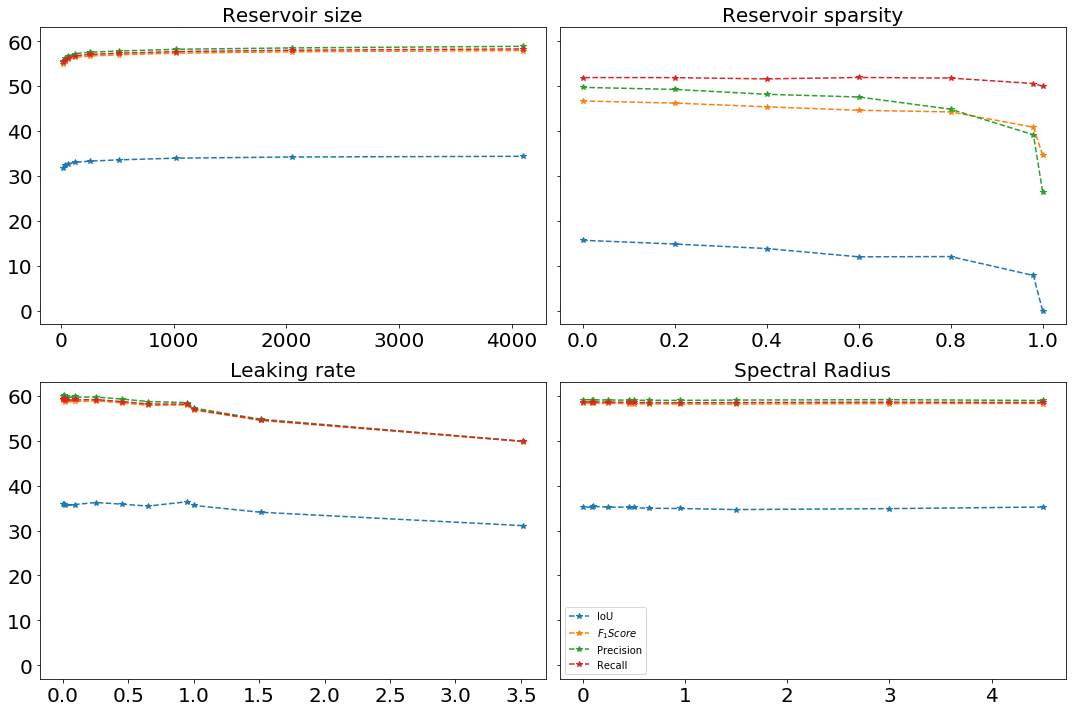

In [4]:

fig, axes = plt.subplots(2,2, figsize=(15,10), sharey=True)
params= ['hidden','sparsity','leakrate','spectralradius']
params_dict={
    'hidden':'Reservoir size',
    'sparsity':'Reservoir sparsity',
    'leakrate':'Leaking rate',
    'spectralradius':'Spectral Radius'
}

markers = ["*","+","+", "o"]

fp_optim=f'../saved_model/Optim/'

for param in params:
    print(param)
    df  = pd.read_csv(glob(os.path.join(fp_optim, f'*{param}*'))[0])
    df =df.rename(
        columns={"valid_iou":'IoU',
                 'valid_f1score':'$F_{1}Score$',
                 'Valid_precision':'Precision',
                 'Valid_recall':'Recall'
                }
    )
    y = df[['IoU','$F_{1}Score$','Precision', 'Recall']]*100
    x = df[param]
    
    display(df)

    cols = y.columns.tolist()
    if param=='hidden':
        axes[0][0].plot(x, y , label=cols, linestyle='--',marker='*')
        axes[0][0].set_title(params_dict[param], size=font)
        
    if param=='sparsity':
        axes[0][1].plot(x, y , label=cols, linestyle='--',marker='*')
        axes[0][1].set_title(params_dict[param], size=font)
    if param=='leakrate':
        axes[1][0].plot(x, y ,label=cols,  linestyle='--', marker='*')
        axes[1][0].set_title(params_dict[param], size=font)
    if param=='spectralradius':
        axes[1][1].plot(x, y ,label=cols, linestyle='--', marker='*')
        axes[1][1].set_title(params_dict[param], size=font)
        axes[1][1].legend(cols)    
    plt.tight_layout()
    plt.rc('xtick',labelsize=font)
    plt.rc('ytick',labelsize=font)
    fig.savefig(f'reservoir_optim.png')
#     plt.show()

In [5]:
def IoU(target_labels: np.array, predicted_labels: np.array):
    target_labels = target_labels.flatten()
    predicted_labels = predicted_labels.flatten()
    intersection = np.logical_and(target_labels, predicted_labels)
    union        = np.logical_or(target_labels, predicted_labels)
    iou_score    = (np.sum(intersection)+1e-6) / (np.sum(union)+1e-6)
    return iou_score

WEIZMANN
BSR
CIFAR_10
CIFAR_100


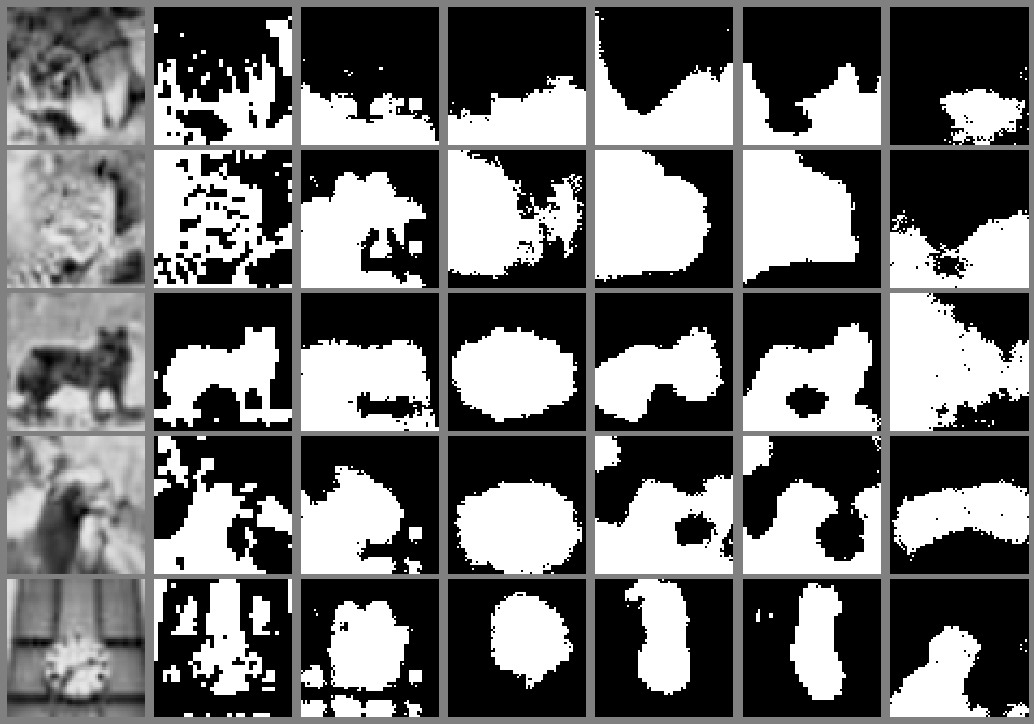

In [61]:
models = ['CNN', 'RNN', 'LSTM','GRU','ESN']
rows, cols =5, 7

fig, axes = plt.subplots(rows, cols, figsize=(15,10), sharey=True)
fig.patch.set_facecolor('gray')
for ds in [ 'WEIZMANN', 'BSR', 'CIFAR_10', 'CIFAR_100']:
    print(ds)
    for model in  models:
        image_path=f'../saved_model/{ds}/{model}/predictions/'
   
        for row in np.arange(rows):
            len_data     = len(glob(os.path.join(image_path, '*output*')))
#             i=np.random.randint(5)

            i=row-8
#             print(i)
            
            
#             iou = IoU(predicted_im[:,:,0], label_im[:,:,0])

            
#             if iou>0.7:

            for col in np.arange(cols):
       
                if col==0:
#                     print('input', i)
                    input_im     =  plt.imread(sorted(glob(os.path.join(image_path, '*input*')))[i])
                    input_im=cv2.cvtColor(input_im[:,:,1], cv2.COLOR_BGR2RGB)
                    axes[row][col].imshow(input_im,   cmap='gray', interpolation='none')
                    axes[row][col].axis("off")

                if col==1:
#                     print('label', i)
                    label_im     = plt.imread(sorted(glob(os.path.join(image_path, '*label*')))[i])
                    axes[row][col].imshow(label_im[:,:,0], cmap='gray',  interpolation='none')
                    axes[row][col].axis("off")

                if model=='ESN':
#                     print(model, i)
                    predicted_im = plt.imread(sorted(glob(os.path.join(image_path, '*output*')))[i])
                    axes[row][2].imshow(predicted_im[:,:,0], cmap='gray',  interpolation='none')
                    axes[row][2].axis("off")

                if model=='RNN':
#                     print(model, i)
                    predicted_im = plt.imread(sorted(glob(os.path.join(image_path, '*output*')))[i])
                    axes[row][3].imshow(predicted_im[:,:,0], cmap='gray',  interpolation='none')
                    axes[row][3].axis("off")

                if model=='LSTM':
#                     print(model, i)
                    predicted_im = plt.imread(sorted(glob(os.path.join(image_path, '*output*')))[i])
                    axes[row][4].imshow(predicted_im[:,:,0], cmap='gray',  interpolation='none')
                    axes[row][4].axis("off")

                if model=='GRU':
#                     print(model, i)
                    predicted_im = plt.imread(sorted(glob(os.path.join(image_path, '*output*')))[i])
                    axes[row][5].imshow(predicted_im[:,:,0], cmap='gray',  interpolation='none')
                    axes[row][5].axis("off")

                if model=='CNN':
#                     print(model, i)
                    predicted_im = plt.imread(sorted(glob(os.path.join(image_path, '*output*')))[i])
                    axes[row][6].imshow(predicted_im[:,:,0], cmap='gray',  interpolation='none')
                    axes[row][6].axis("off")
    plt.tight_layout(pad=0.5, w_pad=0.10, h_pad=0.5)
    fig.savefig(f'{ds}_sample.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

In [ ]:
%% --------------------------------------------------------------------------------------------------
% Document Metadata
\def\fileversion{0.2}
\def\filedate{05 February 2017}
\typeout{Document Style Option 'WitsPhysicsReport' -- Ver. \fileversion\space Released \filedate}
\typeout{Written by Warren Carlson}

%% ----------------------------------------------------------------------------------------------------
% Supply 'WitsPhysicsReport' Class
\NeedsTeXFormat{LaTeX2e}
\ProvidesClass{WitsPhysicsReport}[2017/02/06
    v0.2
    University of the Witwatersrand, School of Physics Undergraduate Report Class]

%% Load base with options
\DeclareOption*{\PassOptionsToClass{\CurrentOption}{article}}
\ProcessOptions\relax
\LoadClass[11pt, a4paper, titlepage, oneside]{article}

%% Fallback
\DeclareOption*{
    \ClassWarning{WitsPhysicsReport}{Unknown option '\CurrentOption'}
}
%% Execute default options
\ExecuteOptions{10pt}

%% Process given options
\ProcessOptions\relax

%% ----------------------------------------------------------------------------------------------------
% Table of contents formatting and structure
\usepackage{multicol}
% Formatting
\RequirePackage{tocloft}

% Add bibliography to table of contents
\RequirePackage[nottoc]{tocbibind}

\setlength\cftparskip{0.2em}
\setlength\cftbeforesecskip{1em}
\setlength\cftaftertoctitleskip{1em}

% Section numbering depths
\setcounter{secnumdepth}{4}	% Numbers section, subsection, subsubsection and paragraph in document
\setcounter{tocdepth}{3}	% Numbers section, subsection and subsubsection in Table of Contents

%% ----------------------------------------------------------------------------------------------------
% PDF Graphics
\RequirePackage{ifpdf}
\ifpdf
    \RequirePackage[pdftex]{graphicx}
    \RequirePackage{epstopdf}
\else
    \RequirePackage{graphicx}
\fi

% Document graphics
\RequirePackage[usenames,dvipsnames]{xcolor}
\RequirePackage{eso-pic}
\RequirePackage{subfig}
\RequirePackage{epsfig}

%% ----------------------------------------------------------------------------------------------------
% Dates
\RequirePackage[english,iso]{isodate}

%% ----------------------------------------------------------------------------------------------------
% Logical Convenience Packages
\RequirePackage{ifthen} % provides \ifthenelse test
\RequirePackage{xifthen} % provides \isempty test

%% ----------------------------------------------------------------------------------------------------
% Links, Citations and Referencse
\RequirePackage[%
    ocgcolorlinks, %
    linkcolor = blue, %
    urlcolor = blue, %
	citecolor = blue, %
    pageanchor = true,%
    hyperindex = true, %
    breaklinks = true, %
    pagebackref = false, %
    linktocpage = true, %
    pdfhighlight = /P]{hyperref}

% Language
\RequirePackage[latin1]{inputenc}
\RequirePackage[english]{babel}

% Page Formatting
\RequirePackage{pdflscape}
\RequirePackage{flafter}
\RequirePackage{lastpage}
\RequirePackage{pdfpages}
% \RequirePackage{fixltx2e}

\RequirePackage{fp} % Allows fixed point mathematics
\RequirePackage{caption} % Allows captions outside of floats

%% --------------------------------------------------------------------------------------------------
% Document page limit
% From: http://stackoverflow.com/questions/2720534/force-a-maximum-number-of-pages-in-latex
% Function to limit the report to 2 pages
\makeatletter
\newcounter{pagecount}
\newcommand{\limitpages}[1]{
    \setcounter{pagecount}{0}%
    \gdef\maxpages{#1}%
    \ifx\latex@outputpage\@undefined\relax%
        \global\let\latex@outputpage\@outputpage%
    \fi%
    \gdef\@outputpage{ %
        \addtocounter{pagecount}{1}%
        \ifnum\value{pagecount}>\maxpages\relax%
						\PackageError{WitsPhysicsReport}{Your specified content exceeds the page limit of the report! The extra pages have been suppressed from the output. Edit your content so that it fits}{Edit your content so that it fits}
            % Do not output the page
        \else%
            \latex@outputpage%
        \fi%
    }%
}
\makeatother

%% --------------------------------------------------------------------------------------------------
% Document Metaparameters

%% Page specification from witsthesis.sty for printing pages that won't be bound
\limitpages{1600}
\RequirePackage{fullpage}

% \RequirePackage[
%    margin=1.5cm,
%    includefoot,
%    footskip=30pt,
%    ]{geometry}


\brokenpenalty=10000
\widowpenalty=10000
\clubpenalty=10000
\interfootnotelinepenalty=10000 % Prevents footnotes being split onto two pages

\renewcommand{\textfraction}{0.0} % <--- my addition.***
\renewcommand{\topfraction}{1.0} % <--- my addition.***
\renewcommand{\bottomfraction}{1.0} % <--- my addition.***

\setcounter{topnumber}{10} % <--- my addition.***
\setcounter{bottomnumber}{10} % <--- my addition.***
\parindent 0em \parskip 2.8ex % No indents, paragraph spacing.

%% ----------------------------------------------------------------------------------------------------
% Title page information and structure

% Institution data capture
\newcommand{\School}{School of Computer Science And Applied Mathematics}
\newcommand{\University}{University of the Witwatersrand \\ \vspace*{1em} Johannesburg}
%\newcommand{\WitsCrest}{\includegraphics[width=0.35\textwidth]{WitsLogo.pdf}}
\newcommand{\WitsCrest}{\includegraphics[height=15em]{Wits_Logo.jpg}}

% Start Title page valiable scoping
\makeatletter

% Author data caputure
\gdef\@title{\textcolor{red}{PLEASE ENTER A REPORT TITILE}}
\gdef\@studentname{\textcolor{red}{PLEASE ENTER YOUR NAME}}
\gdef\@studentnumber{\textcolor{red}{PLEASE ENTER YOUR STUDENT NUMBER}}
\gdef\@studentemail{\textcolor{red}{PLEASE ENTER YOUR EMAIL ADDRESS}}
\gdef\@coursecode{\textcolor{red}{PLEASE ENTER THE COURSE CODE}}
\gdef\@coursename{\textcolor{red}{PLEASE ENTER THE COURSE NAME}}

% Author data reassignment
\newcommand{\Title}[1]        { \ifthenelse{ \isempty{#1} } {} { \gdef\@title{#1} } }
\newcommand{\CourseCode}[1]   { \ifthenelse{ \isempty{#1} } {} { \gdef\@coursecode{#1} } }
\newcommand{\CourseName}[1]   { \ifthenelse{ \isempty{#1} } {} { \gdef\@coursename{#1} } }
\newcommand{\StudentName}[1]  { \ifthenelse{ \isempty{#1} } {} { \gdef\@studentname{#1} } }
\newcommand{\StudentNumber}[1]{ \ifthenelse{ \isempty{#1} } {} { \gdef\@studentnumber{#1} } }
\newcommand{\StudentEmail}[1] { \ifthenelse{ \isempty{#1} } {} { \gdef\@studentemail{\href{mailto:#1}{#1}} } }


% Cover page, table of contents, list of figures
\newcommand{\HRule}{\rule{\linewidth}{0.5mm}}
\renewcommand{\maketitle}{ %
    \begin{titlepage}
        \begin{center}
            \textsc{\LARGE{\University}}\par
            \vspace*{1em}
            \WitsCrest\par
            \vspace*{0.5em}
            \textbf{\Large{\School}}\par
            \vspace*{0.5em}
            \textit{\Large{Thesis presented in fulfilment of the requirements for the degree of Master of Science in Computer Science at the University of the Witwatersrand}}\par
            \vspace*{0.5em}
            \HRule
            \vspace*{1em}
            \textbf{\Large{\@title}}\par
            \vspace*{1em}
            \HRule
        \end{center}
        \vspace*{0.5em}
        
        \begin{center}
                by \\
                \vspace*{0.5em}
        \Large{Thabang L. Mashinini} \\
        \end{center}
        \vspace*{0.5em}
        
         \begin{multicols}{2}
         \centering
         \Large{\textbf{Supervisor}}\\
         Prof. Terence L. Van Zyl \par
          \textbf{Co-supervisor} \\ \par
          \Large{Prof. Turgay Celik}
        \end{multicols}
        \begin{center}
            \today 
        \end{center}
        % \textbf{Student Number:}~\@studentnumber\par
        % \textbf{Email Address:}~\@studentemail\par
    \end{titlepage}
    \newpage
    \pagenumbering{roman}
    \begin{abstract}
    % Echo state networks (ESN) are a novel approach to recurrent neural network training. An ESN consist of a large, fixed recurrent \textit{reservoir} network, from which the desired output is obtained by only training suitable output weight connections. Thus the determination of optimal output weights becomes a linear task. In this thesis, the ESN is used to model the evolution of a partial differential equations (PDEs), with a particular focus on PDEs applied to image segmentation, through active contour models. And also I investigates in detail the merit of replacing the offline with the online learning approach, to the optimization of the global parameters of the ESN.
    \end{abstract}


\section*{Declaration of Authorship}
\noindent I,  THABANG LUKHETHO MASHININI, declare that this thesis titled, 'Solving Partial Differential Equations Using Reservoir Computing: An Application To Iterative Image Segmentation' and the work presented in it are my own.  I Confirm that:

\begin{itemize} 
\item This work was done wholly or mainly while in candidature for a for the degree of Masters of Science at the University of the Witwatersrand.
\item This work has not been submitted to any other institution or for any other degree.
\item Where I have consulted the published work of others, this is always clearly attributed.
\item Where I have quoted from the work of others, the source is always given. With the exception of such quotations, this research proposal is entirely my own work.
\item I have acknowledged all main sources of help.
\item Where the thesis is based on work done by myself jointly with others, I have made clear exactly what was done by others and what I have contributed myself.\\
\end{itemize}
 
\noindent \textbf{Signed}: \quad \includegraphics[height = 2cm ,width=4cm]{signature.png} \\
\rule[0.5em]{25em}{0.5pt} % This prints a line for the signature
 
\noindent \textbf{Date}: \quad \Large{\today} \\
\rule[0.5em]{25em}{0.5pt} % This prints a line to write the date

\newpage
\section*{Acknowledgements}

I Would like to thank my supervisor Prof. Terence Van Zyl for his assistance and guidance and  co-supervisor Prof. Turgay Celik for introduction me to reservoir computing, and also grateful for the funding they provided me during  towards this MSc. But Most importantly allowing me do everything myself so that I can be an independent scientist. In addition, the financial assistance of the South African Bank Seta towards this MSc, is hereby acknowledged.

I would like to thank the Mathematical Sciences Support unit for the High Performance Computing infrastructure provided for computations, and Mr Shunmuga Pillay for allowing me to push the boundaries of the computational resources provided, and letting me know that "I think you're pushing us into new territory"


%I would also like to thank Etienne Vos I have learned so much from you! Thank you very much Etienne.


Finally I would like to thank my family for their encouragement and support of everthing I do, ke ya leboga  Sekhoto sa Makolobane. Go batsadi ba me Sello le Dumazile ke leboga lorato le thego go sengwe le sengwe se ke se dirang. Go mokaulengwe le kgaitsadi Lebogang and Palesa ke leboga tshwaragano le thego e fang yona mo tseleng yaka. Ke leboge Modimo le Badimo bo Sekhoto, manelwa ke pula,  monna wa batho, makolobane, matlotlomela, matleela letlapeng.






\newpage
\section*{Publications}
Aspects of this work have been submitted as follows\normalsize \\

 \textsc{Thabang L. Mashinini, Terence L. Van Zyl and Turgay~Celik}.\\ \footnotesize{\emph{\href{https://www.sciencedirect.com/science/article/pii/S2405896319308065}{Learning Level Set Method by Echo State Network for Image Segmentation.} (preprint 2020)}}\normalsize 

%  \textsc{Milka Cynthia Ijunga Madahana, John Elisa Dimiti Ekoru, Thabang Mashinini}, Otis Tichatonga Nyandoro.\\ \footnotesize{\emph{\href{https://www.sciencedirect.com/science/article/pii/S2405896319308067}{Mine worker threshold shift estimation via optimization algorithms for deep recurrent neural networks.} (18th IFAC Symposium on Automation in Mining, Mineral and Metal Processing). IFAC Proceedings October  2019}}\normalsize \

%  \textsc{Milka Cynthia Ijunga Madahana, John Elisa Dimiti Ekoru, Thabang Mashinini, Otis Tichatonga Nyandoro}.\\ \footnotesize{\emph{\href{https://www.sciencedirect.com/science/article/pii/S2405896319308304}{Noise level policy advising system for mine workers}. (18th IFAC Symposium on Automation in Mining, Mineral and Metal Processing). IFAC Proceedings October  2019}}\normalsize

%     \newpage
%     \tableofcontents
%     \newpage
%     \listoffigures
%     \newpage
%     \listoftables
%     \newpage
%     \pagenumbering{arabic}
%     }

% End Title page variable scoping
\makeatother
%% ----------------------------------------------------------------------------------------------------


%% ----------------------------------------------------------------------------------------------------
% Bibliography Style
\usepackage{natbib} 
\bibliographystyle{plain}
%\setcitestyle{authoryear,open={((},close={))}}


%% --------------------------------------------------------------------------------------------------
% Mathematics Environment and Packages
% Mathematics Packages
\RequirePackage{bm}
\RequirePackage{amsmath,amsthm,amsfonts,amssymb}

% Environments
\newtheorem{theorem}{Theorem}
\newtheorem{acknowledgement}{Acknowledgement}
\newtheorem{algorithm}{Algorithm}
\newtheorem{axiom}{Axiom}
\newtheorem{case}{Case}
\newtheorem{claim}{Claim}
\newtheorem{conclusion}{Conclusion}
\newtheorem{condition}{Condition}
\newtheorem{conjecture}{Conjecture}
\newtheorem{corollary}{Corollary}
\newtheorem{criterion}{Criterion}
\newtheorem{definition}{Definition}
\newtheorem{example}{Example}
\newtheorem{exercise}{Exercise}
\newtheorem{lemma}{Lemma}
\newtheorem{notation}{Notation}
\newtheorem{problem}{Problem}
\newtheorem{proposition}{Proposition}
\newtheorem{remark}{Remark}
\newtheorem{solution}{Solution}
\newtheorem{summary}{Summary}


%------------------------------------------------------------
% General Functions
%------------------------------------------------------------
% New definition of square root: it renames \sqrt as \oldsqrt
\let\oldsqrt\sqrt
%  it defines the new \sqrt in terms of the old one
\def\sqrt{\mathpalette\DHLhksqrt}
\def\DHLhksqrt#1#2{%
\setbox0=\hbox{$#1\oldsqrt{#2\,}$}\dimen0=\ht0
\advance\dimen0-0.2\ht0
\setbox2=\hbox{\vrule height\ht0 depth -\dimen0}%
{\box0\lower0.4pt\box2}}
% logarithm
\let\oldlog\log
\renewcommand{\log}[1]{ \ \textrm{log} \left( #1 \right) }
% natural logarithm
\let\oldln\ln
\renewcommand{\ln}[1]{ \ \textrm{ln} \left( #1 \right) }
% exponential
\let\oldexp\exp
\renewcommand{\exp}[1]{ \ \textrm{exp} \left( #1 \right) }


%--------------------------------------------------------
% Algebraic Functions
%--------------------------------------------------------
% endomorphism
\newcommand{\End}[1]{ \mathrm{End} \left( #1 \right) }
% commutator
\newcommand{\Comm}[1]{ \mathrm{Comm} \left( #1 \right) }
% representation hooks
\newcommand{\hooks}[1]{ \mathrm{hooks} \left( #1 \right) }
% representation weights
\newcommand{\weights}[2]{ \mathrm{weights}_{#2} \left( #1 \right) }
% span
\newcommand{\spanset}[1]{ \ \mathrm{span} \left\{ #1 \right\} }
% determinant
\let\olddet\det
\renewcommand{\det}[1]{ \ \mathrm{det} \left( #1 \right) }
% diagonal
\newcommand{\diag}[1]{ \ \mathrm{diag} \left( #1 \right) }
% measure
\newcommand{\dd}{\mathrm{d}}
% trace
\newcommand{\tr}[1]{ \ \textrm{tr} \left( #1 \right) }
% Residue
\newcommand{\res}[1]{ \ \textrm{Res} \left( #1 \right) }
% Real
\newcommand{\re}[1]{ \ \textrm{Re} \left( #1 \right) }
% Imaginary
\newcommand{\im}[1]{ \ \textrm{Im} \left( #1 \right) }
% sign
\newcommand{\sgn}[1]{ \ \mathrm{sgn} \left( #1 \right) }
% floor
\newcommand{\floor}[1]{ \ \lfloor #1 \rfloor }
% cieling
\newcommand{\cieling}[1]{ \ \lciel #1 \rciel }
% absolute valune
\newcommand{\abs}[1]{ \left| #1 \right| }


%--------------------------------------------------------
% Trigonometric Functions
%--------------------------------------------------------
% cosine
\let\oldcos\cos
\renewcommand{\cos}[1]{ \ \textrm{cos} \left( #1 \right) }
\newcommand{\pcos}[2]{ \ \textrm{cos}^{#2} \left( #1 \right) }
% inverse cosine
\newcommand{\acos}[1]{ \ \textrm{cos}^{-1} \left( #1 \right) }
% sine
\let\oldsin\sin
\renewcommand{\sin}[1]{ \ \textrm{sin} \left( #1 \right) }
\newcommand{\psin}[2]{ \ \textrm{sin}^{#2} \left( #1 \right) }
% inverse sine
\newcommand{\asin}[1]{ \ \textrm{sin}^{-1} \left( #1 \right) }
% tangent
\let\oldtan\tan
\renewcommand{\tan}[1]{ \ \textrm{tan} \left( #1 \right) }
\newcommand{\ptan}[2]{ \ \textrm{tan}^{#2} \left( #1 \right) }
% inverse tangent
\newcommand{\atan}[1]{ \ \textrm{tan}^{-1} \left( #1 \right) }

% hyperbolic cosine
\let\oldcosh\cosh
\renewcommand{\cosh}[1]{ \ \textrm{cosh} \left( #1 \right) }
\newcommand{\pcosh}[2]{ \ \textrm{cosh}^{#2} \left( #1 \right) }
% hyperbolic sine
\let\oldsinh\sinh
\renewcommand{\sinh}[1]{ \ \textrm{sinh} \left( #1 \right) }
\newcommand{\psinh}[2]{ \ \textrm{sinh}^{#2} \left( #1 \right) }
% hyperbolic tangent
\let\oldtanh\tanh
\renewcommand{\tanh}[1]{ \ \textrm{tanh} \left( #1 \right) }
\newcommand{\ptanh}[2]{ \ \textrm{tanh}^{#2} \left( #1 \right) }


%--------------------------------------------------------
% Dirac Notation
%--------------------------------------------------------
% bra
\newcommand{\bra}[1]{ \left< \left. #1 \right. \right| }
% ket
\newcommand{\ket}[1]{ \left| \left. #1 \right. \right> }
% expectation value
\newcommand{\expect}[1]{ \left< #1 \right> }
% braket
\newcommand{\braket}[2]{ \left< \left. #1 \right| #2 \right> }
% dimension
\let\olddim\dim
\renewcommand{\dim}[1]{ \mathrm{dim} \left( #1 \right) }
\newcommand{\ndim}[2]{ \mathrm{dim}_{ #1 } \left( #2 \right) }


%--------------------------------------------------------
% derivatives
%--------------------------------------------------------
% partial operator
\newcommand{\pdiffop}[1]{ \frac{ \partial }{ \partial {#1} } }
\newcommand{\ppdiffop}[2]{ \frac{ \partial^{#2} }{ \partial {#1}^{#2} } }
% partial
\newcommand{\pdiff}[2]{ \left( \frac{ \partial #1 }{ \partial #2 } \right) }
\newcommand{\ppdiff}[3]{ \left( \frac{ \partial^{#3} #1 }{ \partial {#2}^{#3} } \right) }
% total operator
\newcommand{\tdiffop}[1]{ \frac{ \dd }{ \dd #1 } }
\newcommand{\ptdiffop}[2]{ \frac{ \dd^{#2} }{\dd {#1}^{#2} } }
% total
\newcommand{\tdiff}[2]{ \left( \frac{ \dd #1 }{ \dd #2 } \right) }
\newcommand{\ptdiff}[3]{ \left( \frac{ \dd^{#3} #1 }{ \dd {#2}^{#3}} \right) }
%-------------------------------------------------------


%% ----------
\endinput

%% --------------------------------------------------
%% EOF
